<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [29]:
#load all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [2]:
df = pd.read_csv("m2_survey_data.csv")

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0, 0.5, 'Probability Density')

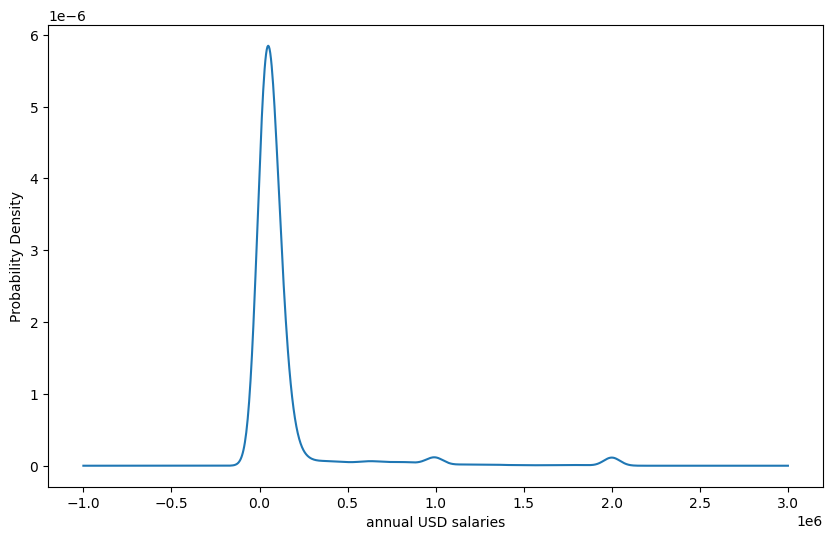

In [3]:
# your code goes here


#import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
df['ConvertedComp'].plot.kde()
plt.xlabel('annual USD salaries')
plt.ylabel('Probability Density')

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Frequency')

<Figure size 1000x600 with 0 Axes>

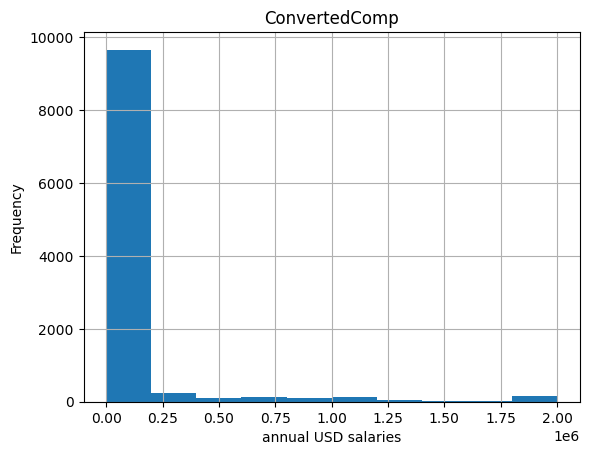

In [4]:
# your code goes here
plt.figure(figsize=(10,6))
df.hist(column='ConvertedComp',bins=10)
plt.xlabel('annual USD salaries')
plt.ylabel('Frequency')

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median = df['ConvertedComp'].median()
print('The median of ConvertedComp column is ', median)

The median of ConvertedComp column is  57745.0


How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
print('The no. of  male responders :',df['Gender'].value_counts()['Man'])

The no. of  male responders : 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
df_W = df[df['Gender']=='Woman']#['ConvertedComp'].median()
Median_W_salary = df_W['ConvertedComp'].median()
print('The median USD salary of women is ',Median_W_salary)

The median USD salary of women is  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


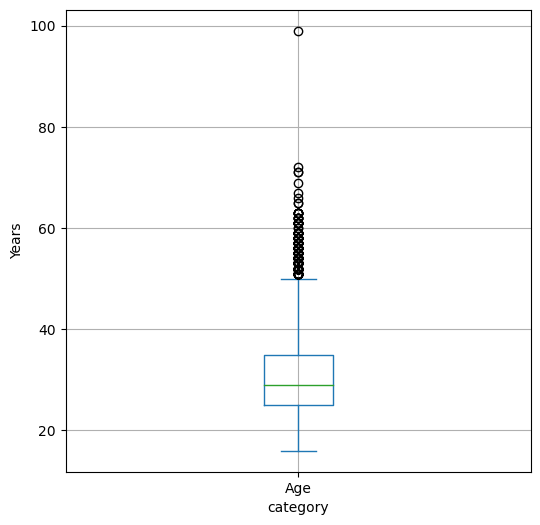

In [27]:
# your code goes here
plt.figure(figsize=(6,6))
df['Age'].plot.box()
plt.xlabel('category')
plt.ylabel('Years')
plt.grid(True)


Plot a histogram of the column `Age`.


<AxesSubplot:>

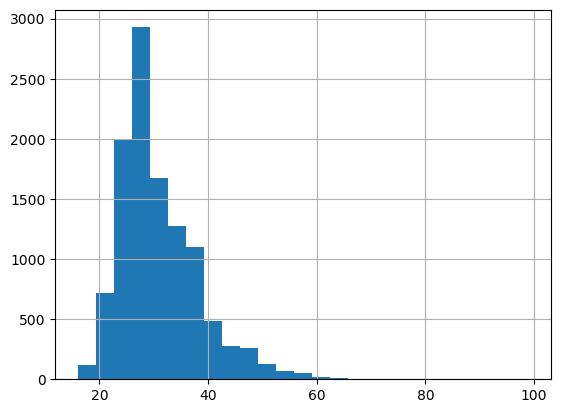

In [24]:
# your code goes here
df['Age'].hist(bins=25)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Figure size 600x600 with 0 Axes>

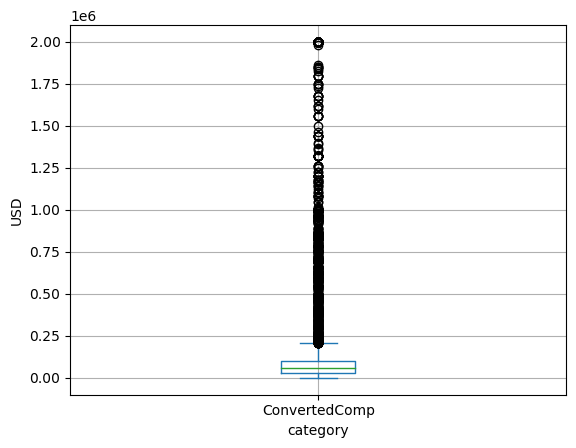

In [28]:
# your code goes here
plt.figure(figsize=(6,6))
df.plot.box(column='ConvertedComp')
plt.xlabel('category')
plt.ylabel('USD')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
# your code goes here
Q1=df['ConvertedComp'].quantile(q=0.25)
Q2=df['ConvertedComp'].quantile(q=0.5)
Q3=df['ConvertedComp'].quantile(q=0.75)

IQR = Q3-Q1
print('the IQR of ConvertedComp is: ',IQR,' and median is ',Q2)

the IQR of ConvertedComp is:  73132.0  and median is  57745.0


Find out the upper and lower bounds.


In [37]:
# your code goes here
upperB = Q3 + 1.5*IQR
if (Q1 - 1.5*IQR) >= 0:
    lowerB = Q1 - 1.5*IQR
else:
    lowerB = 0
print('The lower bound is: ',lowerB,' and the upper bound is: ',upperB, ' USD')

The lower bound is:  0  and the upper bound is:  209698.0  USD


Identify how many outliers are there in the `ConvertedComp` column.


In [48]:
# your code goes here
cond1 = (df['ConvertedComp'] > upperB)
cond2 = df['ConvertedComp'] < lowerB
n_outliners = df[cond1 | cond2]['ConvertedComp'].describe()['count']
print(' the no of outliers in the ConvertedComp column is : ',n_outliners)

 the no of outliers in the ConvertedComp column is :  879.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [51]:
# your code goes here
new_df = df.drop(df[cond1 | cond2].index)
new_df['ConvertedComp'].max()


209356.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [61]:
# your code goes here
df.corr(method='pearson', numeric_only=True)[['Age']]
#df.dtypes['ConvertedComp']

,Age
Respondent,0.004041
CompTotal,0.006970
ConvertedComp,0.105386
WorkWeekHrs,0.036518
CodeRevHrs,-0.020469
Age,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
